## Homework Week 08

1. Explain the coefficient of determination ($R^2$).
2. The mpg dadaset contains the target mpg, and the following features: 
  - cylinders
  - displacement 
  - acceleration 
  - model: the model year
  - origin: where the vehicles were manufactured
  
Plot the scatter plot matrix and correlation matrix, pick two predictor variables for linear regression.
```python
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/mpg.csv')
```

3. Using the picked predictor variables, split the data (20% test, 80% training), predict the mpg by linear regression, print the $R^2$ and MSE in both the training and test set, plot the residual. What does the residual plot tell you?

**Problem 1: Explain the coefficient of determination ($R^2$).**

The coefficient of determination ($R^2$), represents the variation in the dependant variable that can be explained by the independant variable. It can be understood as a standardized version of the Mean Squared Error. It is a fraction of the response variance that is captured by the model:

$R^2$ = $1 − \frac{SSE}{SST}$

R-squared is bounded by 0 and 1 in the training set, but can become negative in the test set. The closer the R-squared value is to 1, the better the model fits to the observations.


**Problem 2: The mpg dadaset contains the target mpg, and the following features:** 
  - **cylinders**
  - **displacement**
  - **acceleration**
  - **model: the model year**
  - **origin: where the vehicles were manufactured**
  
**Plot the scatter plot matrix and correlation matrix, pick two predictor variables for linear regression.**

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/mpg.csv').dropna()

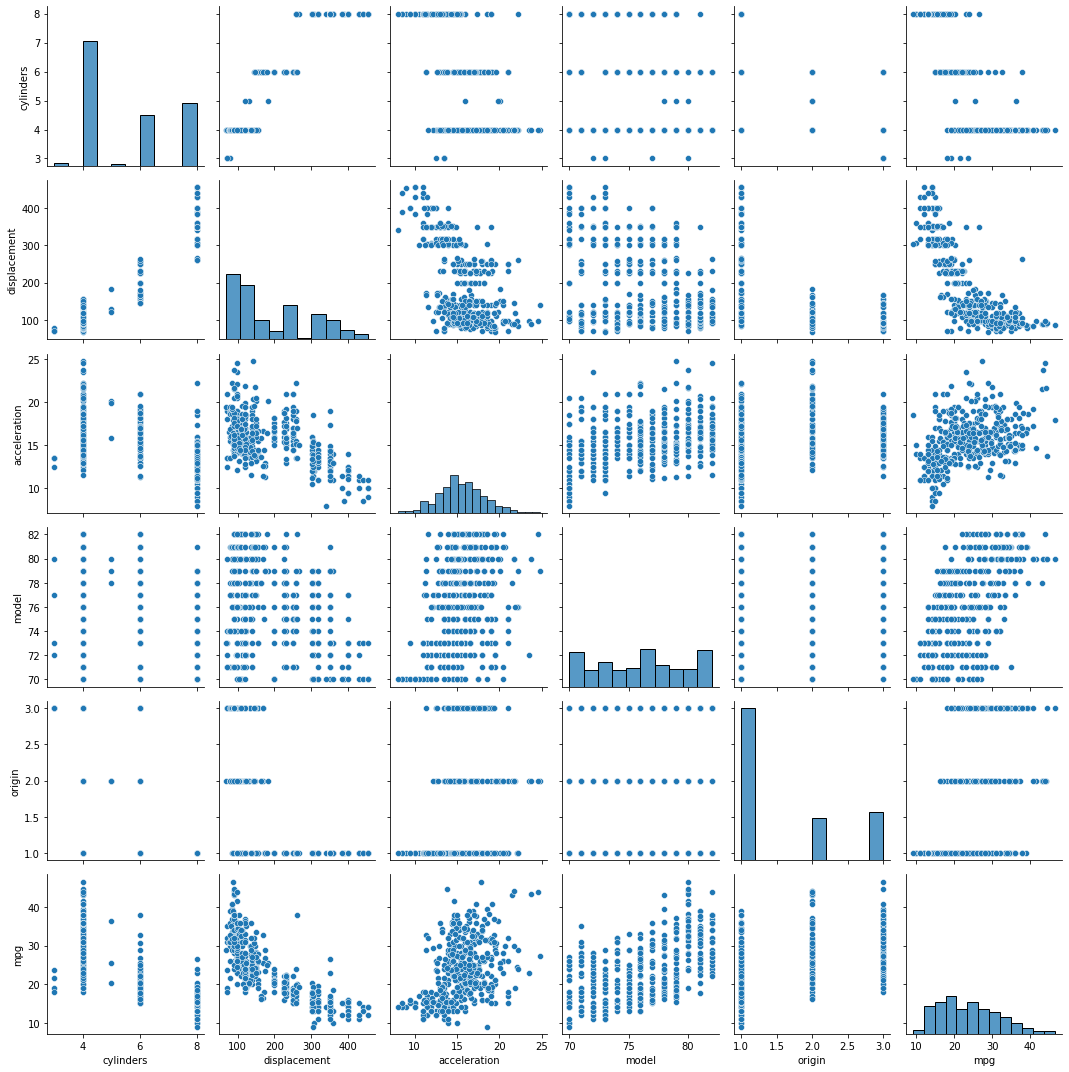

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['cylinders', 'displacement', 'acceleration', 'model', 'origin', 'mpg']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

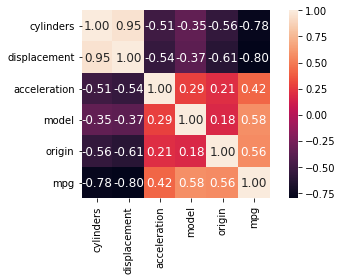

In [4]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols,)

plt.tight_layout()
plt.show()

Based on these results, I'm going to select 'displacement' and 'model' for the linear regression model. 'Cylinders' and 'Displacement' are both highly coorelated with the target variable but also highly coorelated with each other. So, to avoid multicollinearity, I selected one and not the other. Then, I selected 'model' because it has a relatively high positive coorelation with the target variable but is least coorelated with the other chosen predictor 'displacement'.   

**Problem 3: Using the picked predictor variables, split the data (20% test, 80% training), predict the mpg by linear regression, print the  R2  and MSE in both the training and test set, plot the residual. What does the residual plot tell you?**

In [14]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, [2, 4]].values # displacement is column index 2 and model is column index 4
y = df.iloc[:, [0]].values # mpg is first column on index 0

# splitting dataset into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train) # fit the linear regression model on our chosen variables
y_train_pred = lr.predict(X_train) # training predictions
y_test_pred = lr.predict(X_test) # test predicitions

In [18]:
from sklearn.metrics import r2_score

# R^2 scores for the training and test sets
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.725, test: 0.795


In [19]:
from sklearn.metrics import mean_squared_error

# Mean Squared Errors for the training and test sets
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 17.064, test: 11.530


The above R^2 and MSE show that the the model is more accurate and better fit on the test data than the training data. The R^2 is higher for the test data, indicating the model fits better to the test data. The MSE is lower for the test data, indicating the model fits better to the test data.

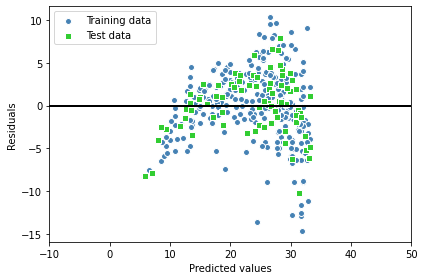

In [20]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

There appears to be a pattern in the plot of the residuals. It appears the model is very good at predicting mpg when the mpg falls around 20 mpg, but no as well below 15 mpg or above 25 mpg. This indicates that the model was unable to capture some of the explanatory information.